In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import multivariant_analysis, load_csv


FILENAME = "drug_age.csv"
filepath = f"../data/{FILENAME}"

In [8]:
drug_age_df = load_csv(filepath)
# Only analysing the inpatient setting
drug_age_df = drug_age_df[drug_age_df['setting'] == 'ip']

In [9]:
drug_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 326
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             164 non-null    object 
 1   time            164 non-null    int64  
 2   start_time      164 non-null    object 
 3   end_time        164 non-null    object 
 4   setting         164 non-null    object 
 5   all drugs       164 non-null    float64
 6   all opioids     164 non-null    float64
 7   stimulants      164 non-null    float64
 8   cannabis        164 non-null    float64
 9   benzodiazepine  164 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 14.1+ KB


In [10]:
drug_age_df.describe()

,time,all drugs,all opioids,stimulants,cannabis,benzodiazepine
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,21.000000,24.791503,3.566069,2.430814,2.507065,0.690070
std,11.868399,10.471298,2.140587,1.937857,2.026562,0.503686
min,1.000000,6.815700,0.533800,0.089000,0.374200,0.038200
25%,11.000000,21.073500,1.904525,0.763300,0.686475,0.236050
50%,21.000000,27.153850,3.251750,1.969700,1.901200,0.466450
75%,31.000000,31.096100,5.230325,3.771500,3.855950,1.165850
max,41.000000,39.777400,7.619800,6.478500,6.688900,1.851000


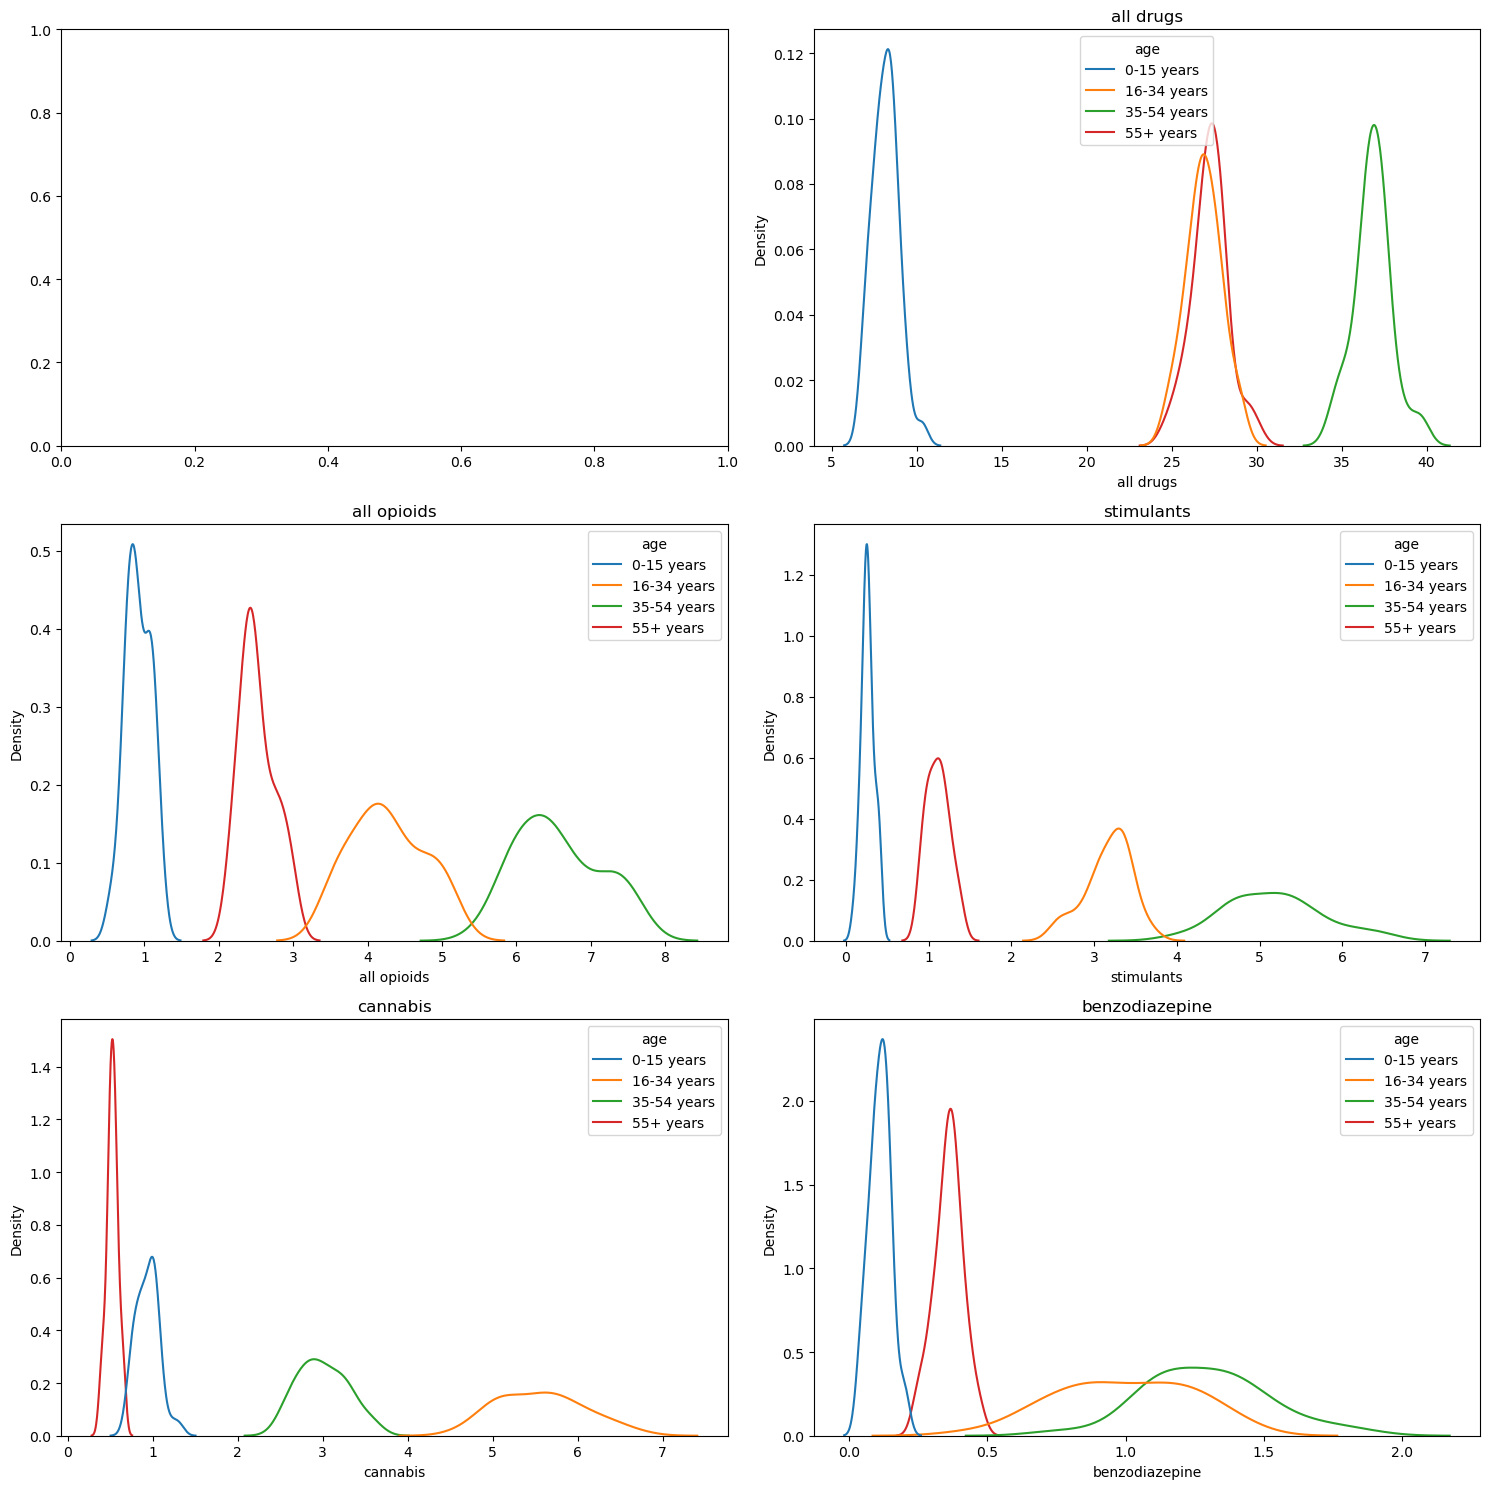

In [11]:
multivariant_analysis(drug_age_df, 'age', 'kde')

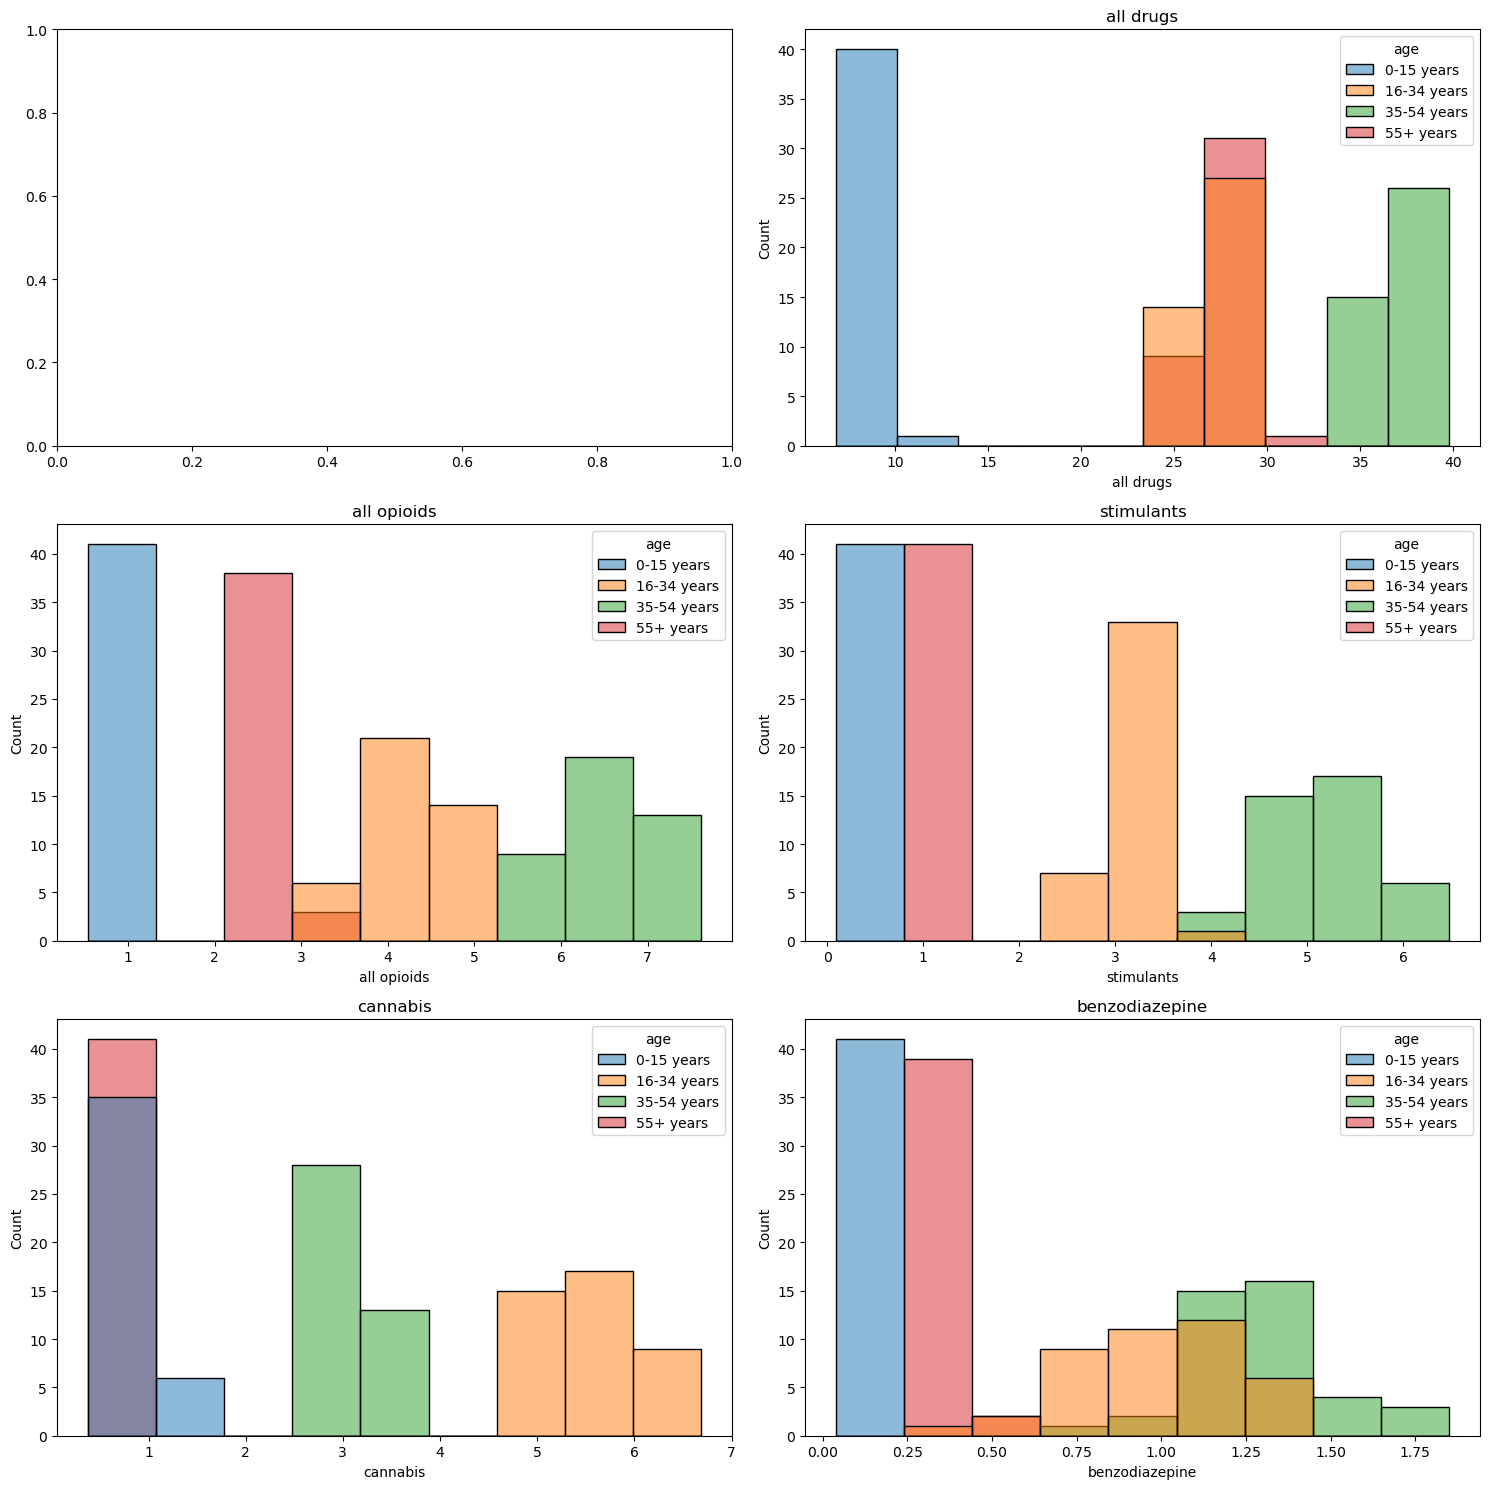

In [12]:
multivariant_analysis(drug_age_df, 'age', 'hist')

all drugs


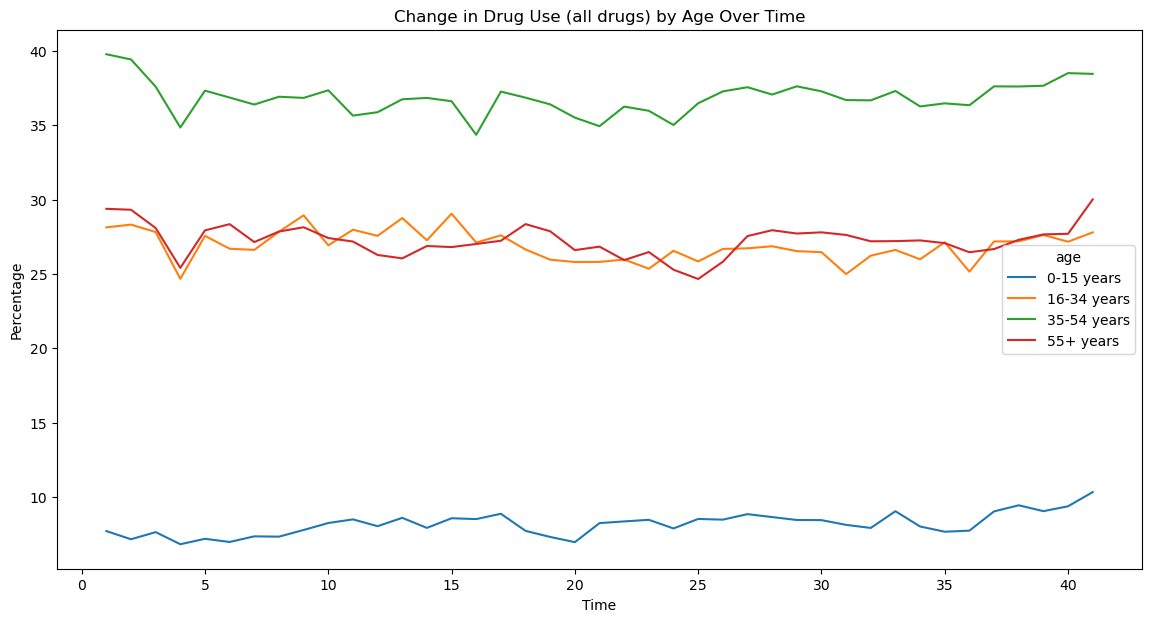

all opioids


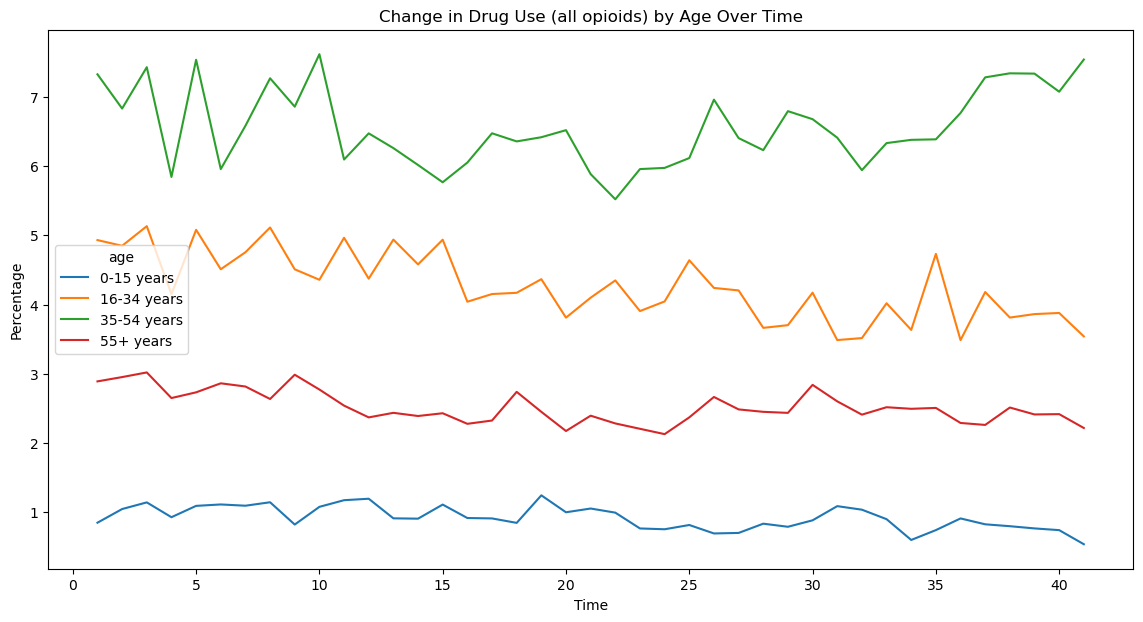

stimulants


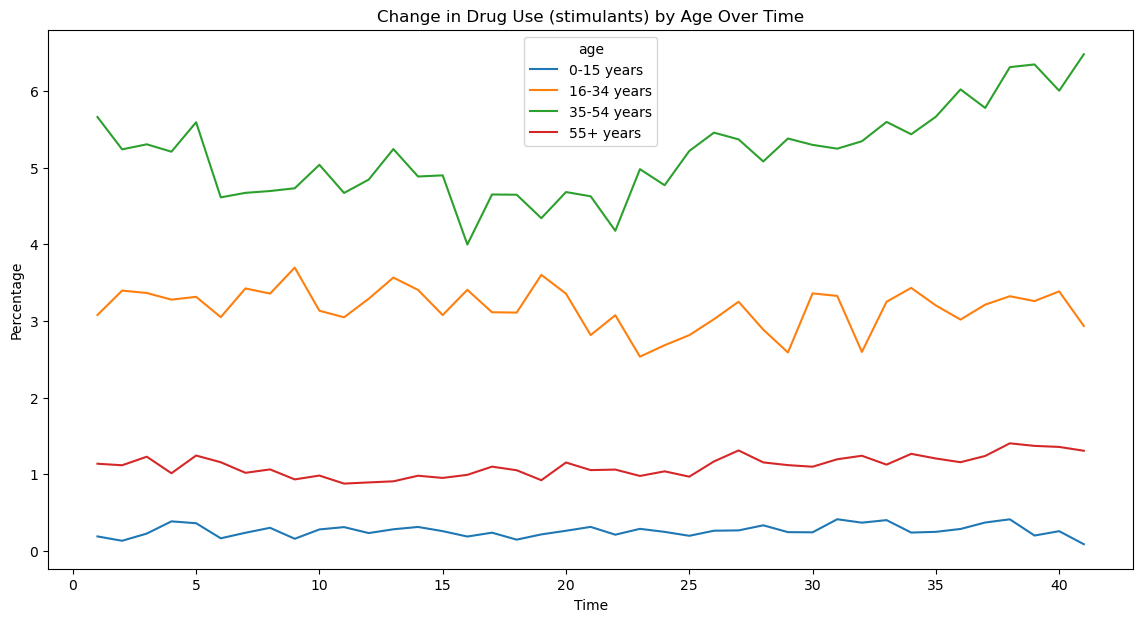

cannabis


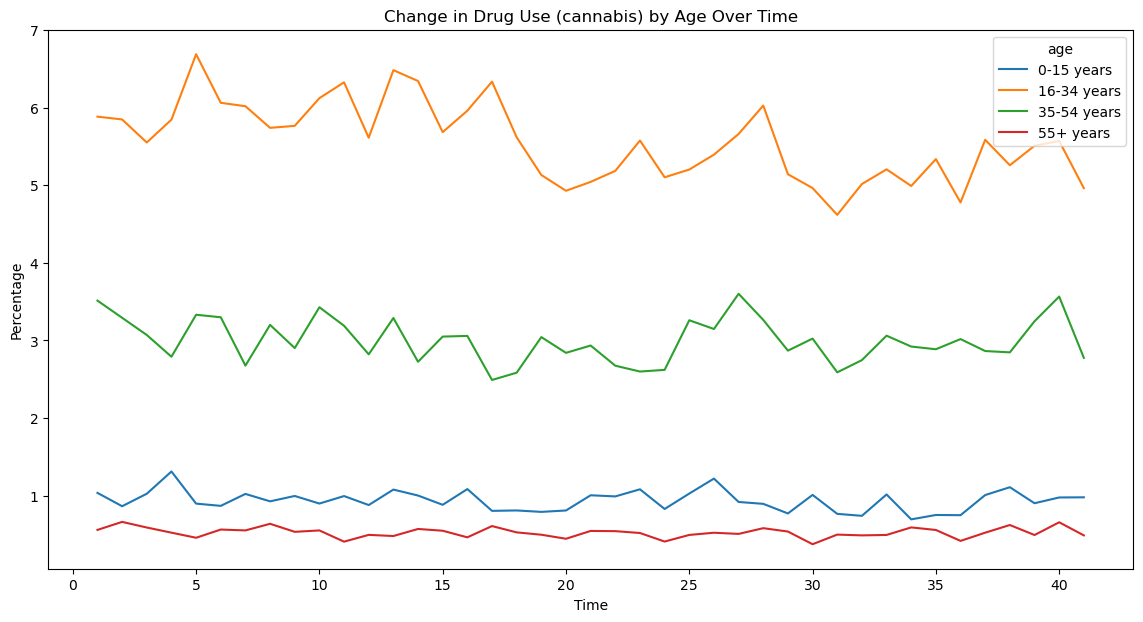

benzodiazepine


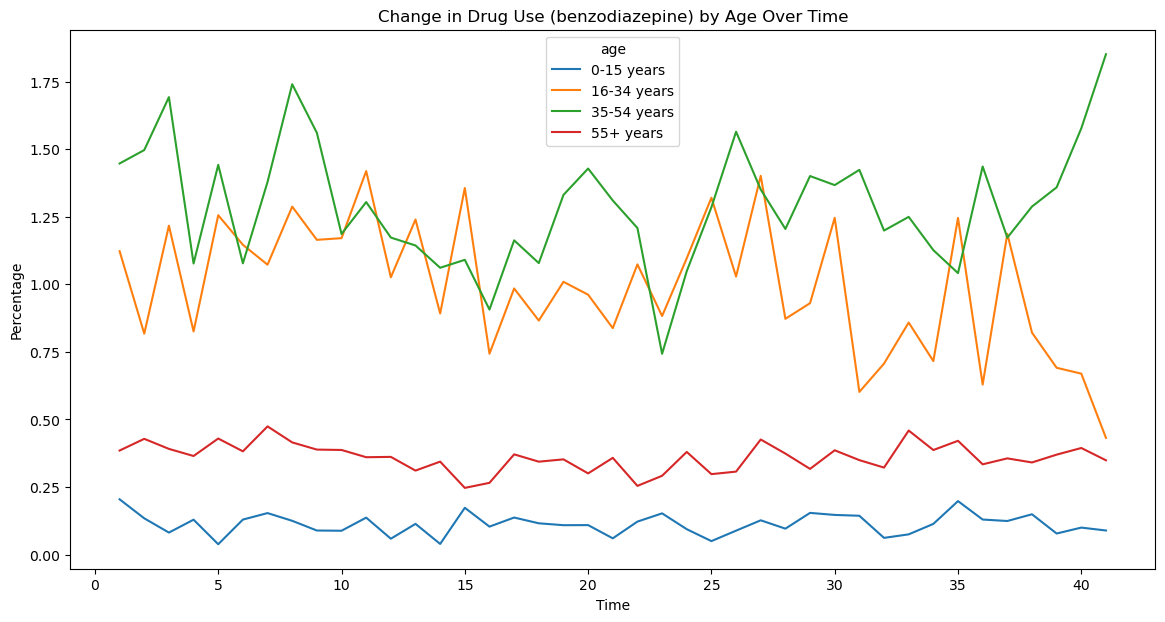

In [13]:
info_columns_to_exclude = ['age', 'setting', 'time', 'start_time', 'end_time']
for col in drug_age_df.columns:
    if col not in info_columns_to_exclude:
        print(col)
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=drug_age_df, x='time', y=col, hue='age')
        title = f"Change in Drug Use ({col}) by Age Over Time"
        plt.title(title)
        plt.ylabel('Percentage')
        plt.xlabel('Time')
        plt.show()